# Hackathon

Some utilities

## Import Utils

In [1]:
ls

4 - DL tutorial - 1st CNN.ipynb  fileCountLabels.pickle  hackathon/
Db_proportions.h5                finaldB.ipynb           pickle.pickle
data/                            fulltoFFT.ipynb         test.ipynb


In [2]:
!pip install keras

    100% |################################| 337kB 3.3MB/s ta 0:00:011
    100% |################################| 256kB 3.9MB/s eta 0:00:01
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /root/.cache/pip/wheels/2c/f7/79/13f3a12cd723892437c0cfbde1230ab4d82947ff7b3839a4fc
Successfully built pyyaml
You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
# cd ..

In [19]:
import keras
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
PATH_DATA = 'data/full.h5'
PATH_PREDICT_WITHOUT_GT = 'data/pred_eighties_from_full_1_without_gt.h5'
#PATH_SUBMIT = 'data/submit/pred_eighties_from_half_1_AWESOMEGROUP.h5'
#PATH_PREDICT_WITH_GT = 'data/pred_teachers/pred_eighties_from_half_1.h5'

In [45]:
BATCH_SIZE = 32
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout
import keras.layers.normalization 
from keras.callbacks import Callback
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
f = h5.File(PATH_DATA)

In [6]:
range(len(f['S2']))

range(0, 18698240)

In [7]:
def get_idxs(h5_path):
    f = h5.File(h5_path)
    return range(len(f['S2']))

def shuffle_idx(sample_idxs):
    return list(np.random.permutation(sample_idxs))

def split_train_val(sample_idxs, proportion):
    n_samples = len(sample_idxs)
    return sample_idxs[:int((1.-proportion)*n_samples)], sample_idxs[int((1.-proportion)*n_samples):]

def get_batch_count(idxs, batch_size):
    batch_count = int(len(idxs)//batch_size)
    remained_samples = len(idxs)%batch_size
    if remained_samples > 0:
        batch_count += 1

    return batch_count

In [8]:
def generator(h5_path, batch_size, idxs):
    f = h5.File(h5_path, 'r')
    while True : 
        idxs = shuffle_idx(idxs)
        batch_count = get_batch_count(idxs, batch_size)
        for b in range(batch_count):
            batch_idxs = idxs[b*batch_size:(b+1)*batch_size]
            batch_idxs = sorted(batch_idxs)
            X = f['S2'][batch_idxs, :,:,:]
            Y = f['TOP_LANDCOVER'][batch_idxs, :]
            yield np.array(X), keras.utils.np_utils.to_categorical(np.array(Y), 23)

In [9]:
idxs = get_idxs(PATH_DATA)
shuffled_idxs = shuffle_idx(idxs)
train_idxs, val_idxs = split_train_val(shuffled_idxs, 0.2)

In [10]:
train_gen = generator(PATH_DATA, BATCH_SIZE, train_idxs)
train_batch_count = get_batch_count(train_idxs, BATCH_SIZE)

val_gen = generator(PATH_DATA, BATCH_SIZE, val_idxs)
val_batch_count = get_batch_count(val_idxs, BATCH_SIZE)

In [11]:
countLabels = np.zeros([23,2])

for i in range(22):
    countLabels[i+1][0] = countLabels[i][0] + 1

for i in range(len(f['TOP_LANDCOVER'])):
    countLabels[int(f['TOP_LANDCOVER'][i])][1] += 1

KeyboardInterrupt: 

In [ ]:
countLabels

In [ ]:
# import pickle
# print("countLabels saved")
# fileLabels = open('fileCountLabels.pickle', 'wb')
# pickle.dump(countLabels, fileLabels)
# fileLabels.close()

In [12]:
# Read from file
import pickle
fileLabels = open('pickle.pickle', 'rb')
countLabels = pickle.load(fileLabels)  # variables come out in the order you put them in
fileLabels.close()
countLabels

array([[0.000000e+00, 0.000000e+00],
       [1.000000e+00, 3.827110e+06],
       [2.000000e+00, 1.250253e+06],
       [3.000000e+00, 2.315736e+06],
       [4.000000e+00, 7.769660e+05],
       [5.000000e+00, 2.167443e+06],
       [6.000000e+00, 6.330000e+02],
       [7.000000e+00, 0.000000e+00],
       [8.000000e+00, 0.000000e+00],
       [9.000000e+00, 3.709000e+03],
       [1.000000e+01, 1.112499e+06],
       [1.100000e+01, 7.657050e+05],
       [1.200000e+01, 4.054392e+06],
       [1.300000e+01, 1.281000e+03],
       [1.400000e+01, 6.341420e+05],
       [1.500000e+01, 3.847000e+03],
       [1.600000e+01, 0.000000e+00],
       [1.700000e+01, 8.647100e+04],
       [1.800000e+01, 3.829000e+03],
       [1.900000e+01, 1.154414e+06],
       [2.000000e+01, 5.382200e+05],
       [2.100000e+01, 1.590000e+03],
       [2.200000e+01, 0.000000e+00]])

In [13]:
tot = np.sum(countLabels[:,1])

In [14]:
countlbl = np.zeros([23,2])
for i in range(22):
    countlbl[i+1][0] = countlbl[i][0] + 1
    
countlbl[:,1] = 100 * countLabels[:,1]/tot #np.around(100 * countLabels[:,1]/tot, decimals = 3)

countlbl

array([[0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.04677553e+01],
       [2.00000000e+00, 6.68647424e+00],
       [3.00000000e+00, 1.23847806e+01],
       [4.00000000e+00, 4.15528948e+00],
       [5.00000000e+00, 1.15916953e+01],
       [6.00000000e+00, 3.38534536e-03],
       [7.00000000e+00, 0.00000000e+00],
       [8.00000000e+00, 0.00000000e+00],
       [9.00000000e+00, 1.98360915e-02],
       [1.00000000e+01, 5.94975249e+00],
       [1.10000000e+01, 4.09506456e+00],
       [1.20000000e+01, 2.16832814e+01],
       [1.30000000e+01, 6.85091217e-03],
       [1.40000000e+01, 3.39145289e+00],
       [1.50000000e+01, 2.05741289e-02],
       [1.60000000e+01, 0.00000000e+00],
       [1.70000000e+01, 4.62455290e-01],
       [1.80000000e+01, 2.04778632e-02],
       [1.90000000e+01, 6.17391797e+00],
       [2.00000000e+01, 2.87845273e+00],
       [2.10000000e+01, 8.50347412e-03],
       [2.20000000e+01, 0.00000000e+00]])

In [15]:
tailleDB = 700000
DB = np.zeros([tailleDB, 16, 16, 4, 1])

# Correspondance : chaque élément est de type [i,j] où j est la classe originale reliée désormais à l'indice i 
cor = np.zeros([12,2], dtype=int)
for i in range(11):
    cor[i+1][0] = cor[i][0] + 1

tempLab = 0
for i in range(23):
    if countlbl[i,1] > 0.2:
        cor[tempLab][1] = i
        tempLab += 1

lblAdded = np.zeros([23,2], dtype = int)
cor

array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5, 10],
       [ 6, 11],
       [ 7, 12],
       [ 8, 14],
       [ 9, 17],
       [10, 19],
       [11, 20]])

In [20]:
int(f['TOP_LANDCOVER'][2])

20

In [21]:
lblComplete = np.zeros([23,2], dtype=int)
for i in range(22):
    lblComplete[i+1][0] = lblComplete[i][0] + 1

for i in range(22):
    if i in cor[:,1]:
        lblComplete[i,1] = countlbl[i,1]/100 * tailleDB
    else:
        lblComplete[i,1] = 0
    
lblComplete
np.sum(lblComplete[:,1])

699438

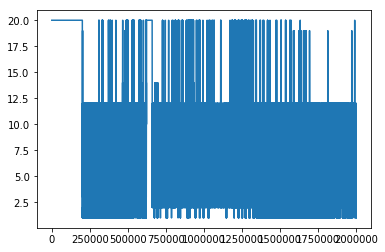

In [22]:
plt.plot(f['TOP_LANDCOVER'][:2000000])

In [23]:
dataBatch = f['S2'][10:10010]
dataClass = f['TOP_LANDCOVER'][10:10010]

In [24]:
type(dataClass)

numpy.ndarray

In [26]:
import random

In [27]:
tailleDB = 699438
picTot = 0

DB = np.zeros([tailleDB, 16, 16, 4])
classY = np.zeros(tailleDB, dtype=int)

countlbl = np.zeros([23,2])
for i in range(22):
    countlbl[i+1][0] = countlbl[i][0] + 1

batchLen = 1000

while picTot < tailleDB:
    ra = np.random.randint(0,18698240)
    dataBatch = f['S2'][ra:ra+batchLen]
    classBatch = f['TOP_LANDCOVER'][ra:ra+batchLen]
    pic = 0
    while pic < batchLen:
        if (countlbl[int(classBatch[pic]),1] < lblComplete[int(classBatch[pic]),1]) and (picTot < tailleDB):
            DB[picTot] = dataBatch[pic]
            classY[picTot] = classBatch[pic]
            picTot +=1
            countlbl[int(classBatch[pic]),1] +=1
            if picTot%1000==0:
                print(picTot)
        pic += 1

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [37]:
import numpy.fft as ft
i=0
DB[i][:,:,0].shape

(16, 16)

In [41]:
fourrier = np.zeros((tailleDB,16,16,4))
for i in range(tailleDB):
    if i%3400==0:
        print(i)
    for canal in range((4)):
        fourrier[i][:,:,canal]=np.absolute(ft.fft2(DB[i][:,:,canal]))

0
3400
6800
10200
13600
17000
20400
23800
27200
30600
34000
37400
40800
44200
47600
51000
54400
57800
61200
64600
68000
71400
74800
78200
81600
85000
88400
91800
95200
98600
102000
105400
108800
112200
115600
119000
122400
125800
129200
132600
136000
139400
142800
146200
149600
153000
156400
159800
163200
166600
170000
173400
176800
180200
183600
187000
190400
193800
197200
200600
204000
207400
210800
214200
217600
221000
224400
227800
231200
234600
238000
241400
244800
248200
251600
255000
258400
261800
265200
268600
272000
275400
278800
282200
285600
289000
292400
295800
299200
302600
306000
309400
312800
316200
319600
323000
326400
329800
333200
336600
340000
343400
346800
350200
353600
357000
360400
363800
367200
370600
374000
377400
380800
384200
387600
391000
394400
397800
401200
404600
408000
411400
414800
418200
421600
425000
428400
431800
435200
438600
442000
445400
448800
452200
455600
459000
462400
465800
469200
472600
476000
479400
482800
486200
489600
493000
496400
499800


In [54]:
fourrier[12].shape



(16, 16, 4)

In [49]:
input_shape=(16,16,4)

model2 = Sequential()
model2.add(BatchNormalization(input_shape=input_shape))

model2.add(Conv2D(32, (5, 5), input_shape=input_shape))

model2.add(Conv2D(32, (5, 5)))
model2.add(Activation('relu'))

model2.add(Conv2D(32, (4, 4)))
model2.add(Activation('relu'))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))


model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.01))
model2.add(Dense(23))
model2.add(Activation('softmax'))


In [50]:
optim = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model2.compile(optimizer=optim,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [71]:
def generator(h5_path, batch_size, coucou):
    f = h5.File(h5_path, 'r')
    while True : 
        idxs = coucou
        batch_count = get_batch_count(idxs, batch_size)
        for b in range(batch_count):
            batch_idxs = idxs[b*batch_size:(b+1)*batch_size]
            batch_idxs = sorted(batch_idxs)
            X = fourrier[batch_idxs, :,:,:]
            Y = classY[batch_idxs]
            yield np.array(X), keras.utils.np_utils.to_categorical(np.array(Y), 23)

In [72]:
shuffled_idxs = shuffle_idx(range(tailleDB))
train_idxs, val_idxs = split_train_val(shuffled_idxs, 0.2)


In [73]:
train_gen = generator(PATH_DATA, BATCH_SIZE, train_idxs)
train_batch_count = get_batch_count(train_idxs, BATCH_SIZE)

val_gen = generator(PATH_DATA, BATCH_SIZE, val_idxs)
val_batch_count = get_batch_count(val_idxs, BATCH_SIZE)

In [74]:
len(train_idxs)

559550

In [76]:
model2.fit_generator(train_gen,steps_per_epoch=1000, epochs=10, verbose=1, validation_data=val_gen, nb_val_samples=100)

Epoch 1/10
  19/1000 [..............................] - ETA: 9s - loss: 1.3780 - acc: 0.5280 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., epochs=10, validation_steps=100, validation_data=<generator..., steps_per_epoch=1000, verbose=1)`
  """Entry point for launching an IPython kernel.


1000/1000 [==============================] - 10s 10ms/step - loss: 1.4136 - acc: 0.4994 - val_loss: 1.3479 - val_acc: 0.5212
Epoch 2/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.4042 - acc: 0.5028 - val_loss: 1.4118 - val_acc: 0.5128
Epoch 3/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.3820 - acc: 0.5105 - val_loss: 1.3264 - val_acc: 0.5419
Epoch 4/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.3859 - acc: 0.5082 - val_loss: 1.3280 - val_acc: 0.5241
Epoch 5/10
1000/1000 [==============================] - 9s 9ms/step - loss: 1.3593 - acc: 0.5166 - val_loss: 1.3126 - val_acc: 0.5347
Epoch 6/10
1000/1000 [==============================] - 9s 9ms/step - loss: 1.3486 - acc: 0.5213 - val_loss: 1.3595 - val_acc: 0.5228
Epoch 7/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.3334 - acc: 0.5246 - val_loss: 1.3444 - val_acc: 0.5184
Epoch 8/10
1000/1000 [==============================] - 10s 10m

In [81]:
test = h5.File('data/pred_eighties_from_full_1_without_gt.h5')

OSError: Unable to create file (unable to open file: name = 'data/pred_eighties_from_full_1_without_gt.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

In [80]:
test

<bound method MappingHDF5.keys of <HDF5 file "pred_eighties_from_full_1_without_gt.h5" (mode r+)>>

In [ ]:
taille_test_db = len(f2['S2'])

In [ ]:
fourrier_test = np.zeros((tailleDB,16,16,4))
for i in range(tailleDB):
    if i%3400==0:
        print(i)
    for canal in range((4)):
        fourrier[i][:,:,canal]=np.absolute(ft.fft2(DB[i][:,:,canal]))

In [ ]:
import h5py

h5f = h5py.File('Db_proportions.h5', 'w')
h5f.create_dataset('dataset_prop', data=DB)
h5f.close()

In [ ]:
DB[0,0,0,0]

In [ ]:
verif = h5py.File('Db_proportions.h5')

In [ ]:
for element in verif.items():
    print(element[0])
    print(element[1])
    print(element[1].name)
verif.close()

In [ ]:
list_elmts = [key for key in verif['/'].keys()]
for key in list_elmts:
    print(key)
    print(type(verif['/'][key]))
    print(verif['/'][key])
    print([key for key in verif['/'][key].keys()])

In [ ]:
# idxs_test = get_idxs(PATH_PREDICT_WITHOUT_GT)

In [ ]:
print(train_batch_count, val_batch_count)

# Instanciation du model

In [ ]:
#model 1
input_shape = (16,16,4)
model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(8,(5,5),activation='relu',input_shape =(16,16,4)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(8,(5,5),activation='relu',input_shape =(16,16,4)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(200,activation ='relu'))
model.add(Dropout(0.01))

model.add(Dense(23,activation ='softmax'))


In [ ]:
#model 2
input_shape=(16,16,4)
model2 = Sequential()
model2.add(BatchNormalization(input_shape=input_shape))

model2.add(Conv2D(32, (5, 5), input_shape=input_shape))
model2.add(Activation('relu'))

model2.add(Conv2D(32, (5, 5)))
model2.add(Activation('relu'))

model2.add(Conv2D(32, (4, 4)))
model2.add(Activation('relu'))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))


model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.01))
model2.add(Dense(23))
model2.add(Activation('softmax'))

# Fit

In [ ]:
# optim = keras.optimizers.Adam(lr=0.001)
optim = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model2.compile(optimizer=optim,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model2.fit_generator(train_gen, steps_per_epoch=100, epochs=4, verbose=1, validation_data=val_gen, nb_val_samples=100)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

for i, (name, values) in enumerate(history.history.items()):
    plt.subplot(1, len(history.history.items()), i+1)
    plt.plot(values)
    plt.title(name)

## Prediction routines

In order to submit a result here are some gits

In [ ]:
import os 
def prediction_generator(h5_path, batch_size, idxs):
    f = h5.File(h5_path, 'r')

    batch_count = get_batch_count(idxs, batch_size)
    
    for b in range(batch_count):
        batch_idxs = idxs[b*batch_size:(b+1)*batch_size]
        batch_idxs = sorted(batch_idxs)
        X = f['S2'][batch_idxs, :,:,:]
        yield np.array(X)

def build_h5_pred_file(pred, h5_output_path):
    if os.path.exists(h5_output_path):
        os.remove(h5_output_path)
    f = h5.File(h5_output_path, 'w')
    top_landcover_submit = f.create_dataset("TOP_LANDCOVER", (len(pred), 1), maxshape=(None, 1))
    top_landcover_submit[:, 0] = pred
    f.close()
    
    return 1

In [ ]:
pred_idx = get_idxs(PATH_PREDICT_WITHOUT_GT)
print(len(pred_idx))
pred_gen = prediction_generator(PATH_PREDICT_WITHOUT_GT, BATCH_SIZE, pred_idx)
prediction = model2.predict_generator(pred_gen, steps=get_batch_count(pred_idx, BATCH_SIZE), verbose=1)
print(prediction)
#build_h5_pred_file(np.argmax(prediction, axis = 1), PATH_SUBMIT)

In [ ]:
def resultat_avec_csv(modele,name,path):

    pred_idx = get_idxs(path)
    pred_gen = prediction_generator(path, BATCH_SIZE, pred_idx)
    prediction = modele.predict_generator(pred_gen, steps=get_batch_count(pred_idx, BATCH_SIZE), verbose=1)
    class_prediction = np.argmax(prediction, axis = 1)
    tosubmit = pd.DataFrame([pred_idx,class_prediction]).transpose()
    tosubmit.columns=["ID","TOP_LANDCOVER"]
    to_submit_csv = tosubmit.to_csv('%s.csv'%(name),sep=',',index= False)
    return prediction

def resultat(modele,path):

    pred_idx = get_idxs(path)
    pred_gen = prediction_generator(path, BATCH_SIZE, pred_idx)
    prediction = modele.predict_generator(pred_gen, steps=get_batch_count(pred_idx, BATCH_SIZE), verbose=1)


    return prediction

In [ ]:
essai =resultat(model2,PATH_DATA)

In [ ]:
resultat_avec_csv(model2,"jubois_palmi",PATH_PREDICT_WITHOUT_GT)

## Some ideas for monitoring

In [ ]:
7700/32


In [ ]:
def gt_generator(h5_path, batch_size, idxs):
    f = h5.File(h5_path, 'r')

    batch_count = get_batch_count(idxs, batch_size)
    print(batch_count)
    for b in range(batch_count):
        if (b+1)*batch_size<
        batch_idxs = idxs[b*batch_size:(b+1)*batch_size]
        batch_idxs = sorted(batch_idxs)
        print(max(batch_idxs))
        Y = f['TOP_LANDCOVER'][batch_idxs, :]
        yield keras.utils.np_utils.to_categorical(np.array(Y), 23)

gt_gen = gt_generator(PATH_DATA, BATCH_SIZE, pred_idx)
gt = []
for elem in gt_gen:
    gt.append(elem)
gt = np.vstack(gt)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' #if normalize else '.i'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",fontsize=7)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def clean_confusion_matrix(confusion_matrix, classes):
    real_classes = []
    for c in range(len(classes)):
        if np.sum(confusion_matrix[:,c])+np.sum(confusion_matrix[c, :]) != 0:
            real_classes.append(c)
    real_confusion_matrix = np.empty((len(real_classes), len(real_classes)))  
    for c_index in range(len(real_classes)):
        real_confusion_matrix[c_index,:] = confusion_matrix[real_classes[c_index], real_classes]
    return real_confusion_matrix, real_classes

In [ ]:
list_top=list(f['TOP_LANDCOVER'])

In [ ]:
%matplotlib notebook
from sklearn.metrics import confusion_matrix
y_true = np.array(list_top)
y_pred = np.argmax(essai, axis = 1)

real_cnf_matrix, real_classes = clean_confusion_matrix(confusion_matrix(y_true, y_pred, labels= range(23)), range(23))
plot_confusion_matrix(real_cnf_matrix, classes = real_classes, normalize=True)

In [ ]:
list_top[:20][0][0]

In [ ]:
len(list_top)